In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from pandas.plotting import scatter_matrix
%matplotlib inline

df = pd.read_csv("../Data/diabetes.csv")

df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(None,
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            6      148             72             35        0  33.6   
 1            1       85             66             29        0  26.6   
 2            8      183             64              0        0  23.3   
 3            1       89             66             23       94  28.1   
 4            0      137             40             35      168  43.1   
 
    DiabetesPedigreeFunction  Age  Outcome  
 0                     0.627   50        1  
 1                     0.351   31        0  
 2                     0.672   32        1  
 3                     0.167   21        0  
 4                     2.288   33        1  )

***Check for missing values***

In [2]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

***Check for duplicates***

In [3]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

***Description of our data(statistics)***

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


***Identify columns with zeros***
**(Zeros might indicate missing values)**

In [5]:
zeros = (df == 0).sum()
zeros
# From the above columns like Glucose,blood pressure,skin thickness,insulin and BMI contain zero values which are likely to be missing values.

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

***Replace zeros with Nan***

In [6]:
columns_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[columns_with_zeros] = df[columns_with_zeros].replace(0, np.nan)
# Check for null again
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

***Handle missing values using imputation techniques such as median or mean.***

In [7]:
# Impute with median as it is robust to outliers
for col in ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]: df[col].fillna(df[col].median(), inplace=True)

df.isnull().sum()

/tmp/ipykernel_14717/983210574.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  for col in ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]: df[col].fillna(df[col].median(), inplace=True)
/tmp/ipykernel_14717/983210574.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

***Check for outliers***

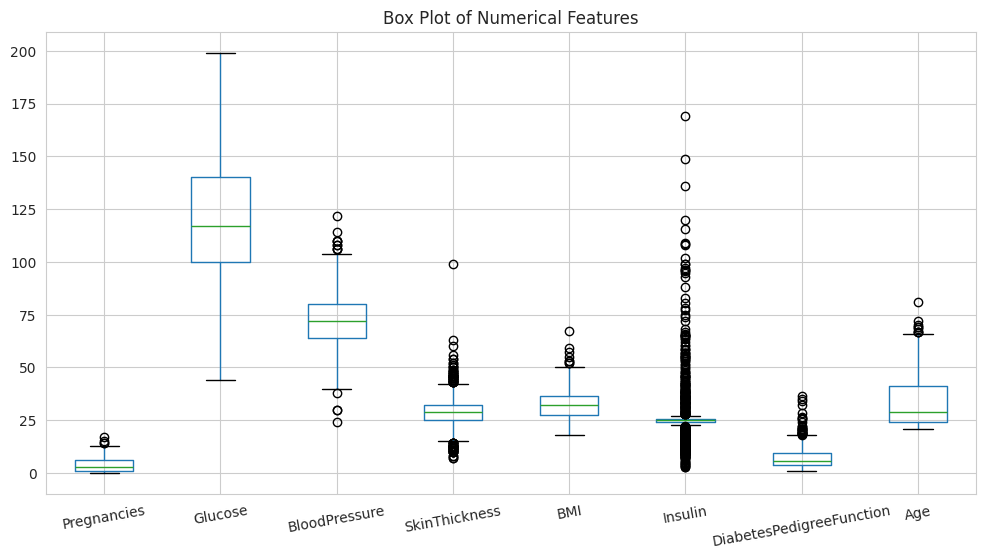

In [8]:
sns.set_style("whitegrid")

df_scaled = df.copy()
df_scaled["DiabetesPedigreeFunction"] *=15 # Scale up this feature
df_scaled["Insulin"] /=5 # Scale down this feature
plt.figure(figsize=(12, 6))
df_scaled.boxplot(column=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "BMI", "Insulin", "DiabetesPedigreeFunction", "Age"])
plt.xticks(rotation=10)
plt.title("Box Plot of Numerical Features")
plt.show()
# The box plot reveals some potential outliers

***Confirm outliers using Interquartile Range method***

In [9]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers.shape[0]

# Check number of outliers in each numerical column
outliers_count = {col: detect_outliers_iqr(df, col) for col in ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "BMI", "DiabetesPedigreeFunction", "Age"]}
outliers_count

{'Pregnancies': 4,
 'Glucose': 0,
 'BloodPressure': 14,
 'SkinThickness': 87,
 'BMI': 8,
 'DiabetesPedigreeFunction': 29,
 'Age': 9}

***Cap outlier values preserve data while reducing extremes***
**(Remove insulin as it has too many missing values)**

In [10]:
# Function to cap outliers using IQR bounds
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Apply capping on selected columns
for col in ["BloodPressure", "SkinThickness", "BMI", "DiabetesPedigreeFunction", "Age"]:
    cap_outliers(df, col)

df.drop(columns=["Insulin"], inplace=True)
# Verify if extreme values are capped
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.358073,28.866536,32.393359,0.458914,33.199870,0.348958
std,3.369578,30.438286,11.697097,7.442353,6.667471,0.285596,11.628404,0.476951
min,0.000000,44.000000,40.000000,14.500000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,104.000000,42.500000,50.250000,1.200000,66.500000,1.000000


***Visualizations***

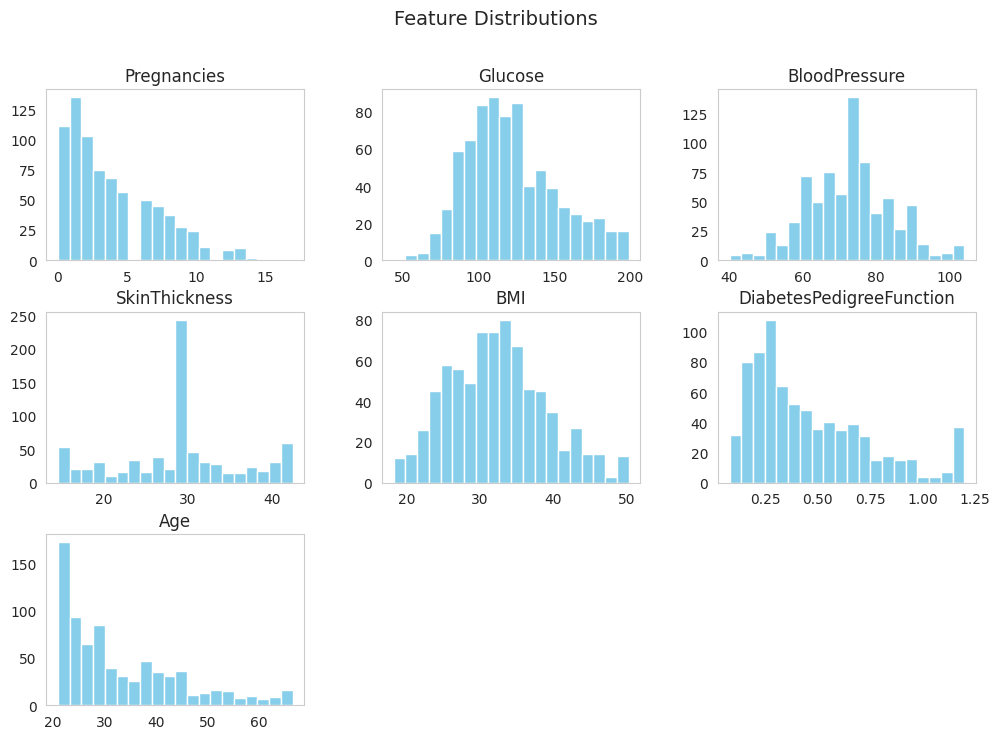

In [11]:
# Plot histograms for numerical features
numerical_columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "BMI", "DiabetesPedigreeFunction", "Age"]
df[numerical_columns].hist(figsize=(12, 8), bins=20, grid=False, color="skyblue")
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()


***Correlatin maxtrix***

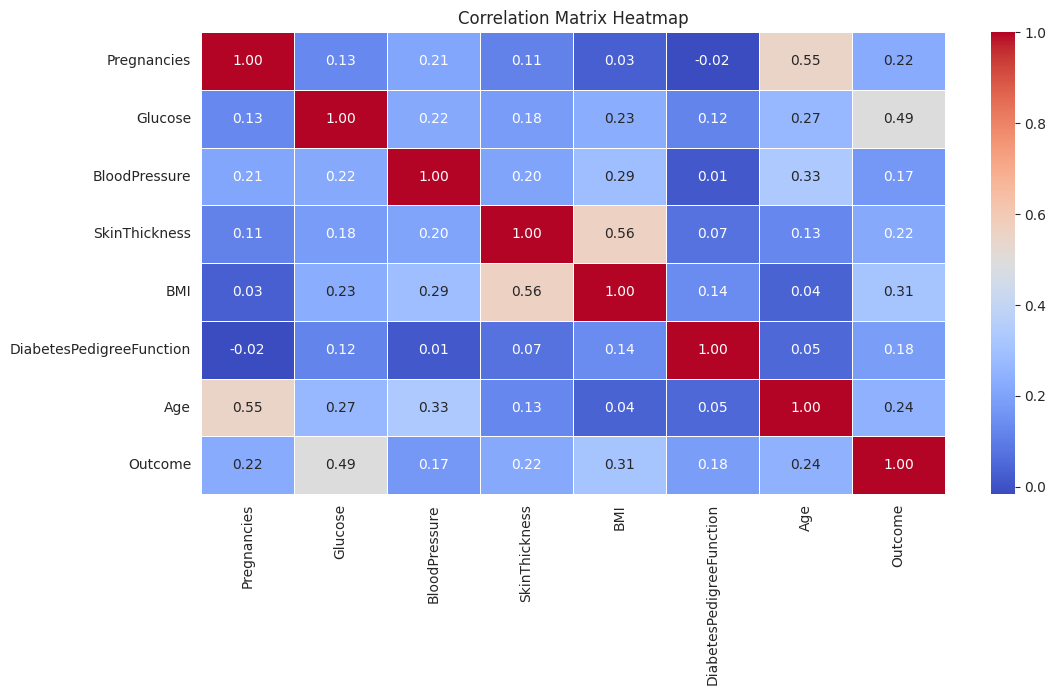

In [12]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


***Count plot for the outcome***

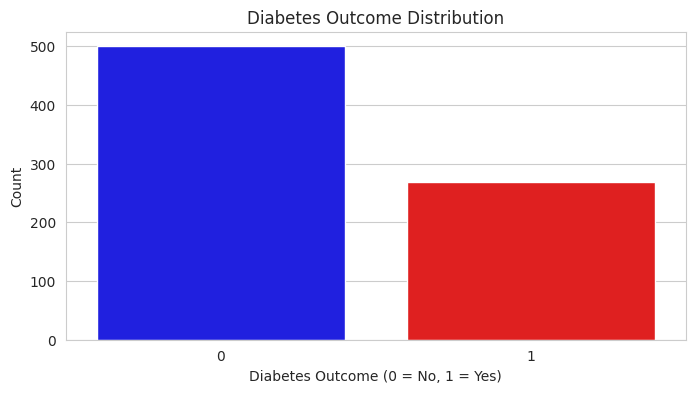

In [13]:
plt.figure(figsize=(8, 4))
sns.countplot(
    x="Outcome", 
    data=df, 
    hue="Outcome",  # Set Outcome as hue
    palette={0: "blue", 1: "red"},  # Assign colors to each class
    legend=False  # Hide duplicate legend
)
plt.xlabel(f'Diabetes Outcome (0 = No, 1 = Yes)')
plt.ylabel("Count")
plt.title("Diabetes Outcome Distribution")
plt.show()
# Most people in the data do not have diabetes

***How Glucos Differ Between Diabetics and Non-Diabetics***

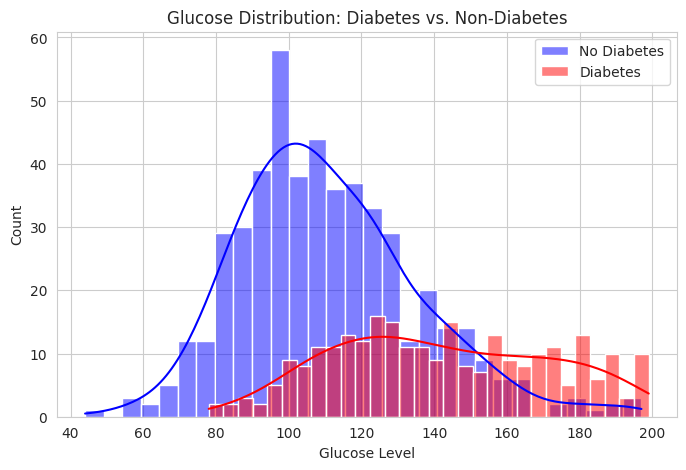

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df[df["Outcome"] == 0]["Glucose"], color="blue", label="No Diabetes", kde=True, bins=30)
sns.histplot(df[df["Outcome"] == 1]["Glucose"], color="red", label="Diabetes", kde=True, bins=30)
plt.xlabel("Glucose Level")
plt.ylabel("Count")
plt.title("Glucose Distribution: Diabetes vs. Non-Diabetes")
plt.legend()
plt.show()
# It is seen that diabetics tend to have higher glucose levels.


***Age Distribution Between Diabetics and Non-Diabetics***


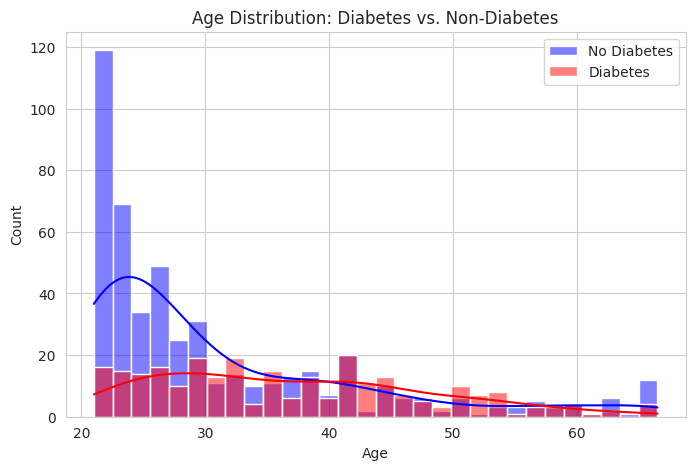

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df[df["Outcome"] == 0]["Age"], color="blue", label="No Diabetes", kde=True, bins=30)
sns.histplot(df[df["Outcome"] == 1]["Age"], color="red", label="Diabetes", kde=True, bins=30)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution: Diabetes vs. Non-Diabetes")
plt.legend()
plt.show()

# Diabetes is more common in older individuals.
# Younger individuals (under 30) have a lower risk, but it still exists.

***BMI between Diabetics and Non-Diabetics***

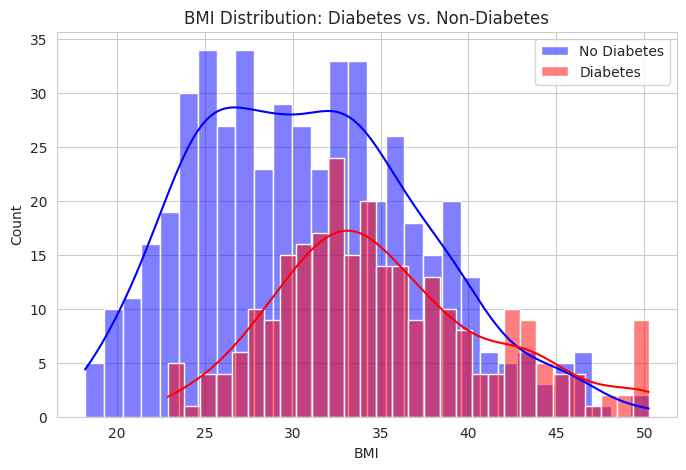

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df[df["Outcome"] == 0]["BMI"], color="blue", label="No Diabetes", kde=True, bins=30)
sns.histplot(df[df["Outcome"] == 1]["BMI"], color="red", label="Diabetes", kde=True, bins=30)
plt.xlabel("BMI")
plt.ylabel("Count")
plt.title("BMI Distribution: Diabetes vs. Non-Diabetes")
plt.legend()
plt.show()
# Higher BMI values increase diabetes risk.

***Splitting data to features and scaling***

In [17]:
scaler = StandardScaler()

# Feature Scaling before splitting
X = df.drop("Outcome", axis=1)

# Keeping target variable unchanged
y = df["Outcome"]

X_scaled = pd.DataFrame(scaler.fit_transform(X))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

X_scaled.head(), y.head()


(          0         1         2         3         4         5         6
 0  0.639947  0.866045 -0.030632  0.824667  0.181092  0.588927  1.445691
 1 -0.844885 -1.205066 -0.543914  0.017945 -0.869465 -0.378101 -0.189304
 2  1.233880  2.016662 -0.715008  0.017945 -1.364728  0.746595 -0.103252
 3 -0.844885 -1.073567 -0.543914 -0.788777 -0.644346 -1.022787 -1.049828
 4 -1.141852  0.504422 -2.768136  0.824667  1.606849  2.596563 -0.017199,
 0    1
 1    0
 2    1
 3    0
 4    1
 Name: Outcome, dtype: int64)

***K-Nearest Neighbor***

In [18]:
test_scores = []
train_scores = []

for i in range(1, 15):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [19]:
# Check train scores
train_scores

[1.0,
 0.8322475570032574,
 0.8403908794788274,
 0.7996742671009772,
 0.8143322475570033,
 0.7947882736156352,
 0.8045602605863192,
 0.7980456026058632,
 0.8159609120521173,
 0.8127035830618893,
 0.8045602605863192,
 0.7964169381107492,
 0.8078175895765473,
 0.7899022801302932]

In [20]:
# Check test scores
test_scores

[0.6753246753246753,
 0.7077922077922078,
 0.7532467532467533,
 0.7532467532467533,
 0.7662337662337663,
 0.7337662337662337,
 0.7337662337662337,
 0.7142857142857143,
 0.7207792207792207,
 0.7207792207792207,
 0.7272727272727273,
 0.7402597402597403,
 0.7467532467532467,
 0.7337662337662337]

***Max test and train scores***

In [21]:
# TRAIN SCORE
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100, list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [22]:
# TEST SCORE
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100, list(map(lambda x: x+1, test_scores_ind))))

Max test score 76.62337662337663 % and k = [5]


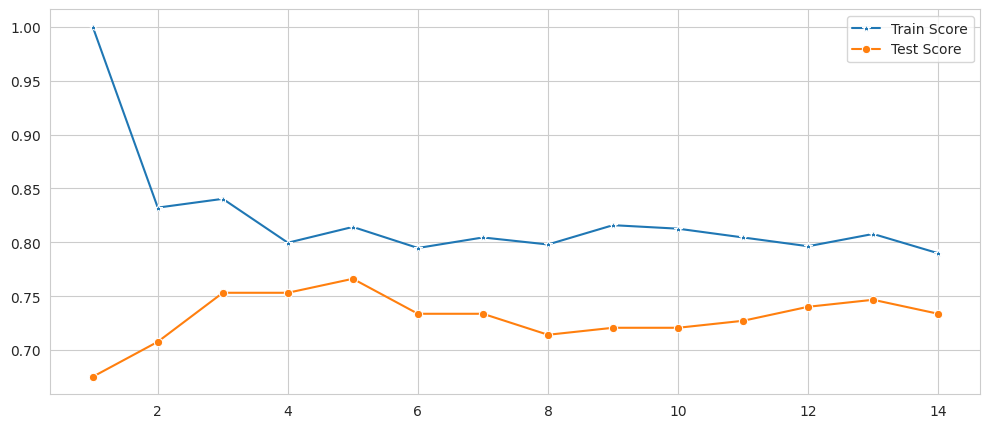

In [23]:
plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(1,15), y=train_scores, marker='*', label='Train Score')
p = sns.lineplot(x=range(1,15), y=test_scores, marker='o', label='Test Score')
# Graph checking best training and testing score

In [24]:
knn = KNeighborsClassifier(5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn.score(X_test, y_test)
print(f"Accuracy: {accuracy_score(y_test, knn_pred)}")
# Use k=5 to build a model

Accuracy: 0.7662337662337663


***Cross-Validation***

In [25]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())



Cross-validation scores: [0.72727273 0.72077922 0.65584416 0.79738562 0.73856209]
Mean CV accuracy: 0.7279687632628808


***Confusion Matrix***

Text(0.5, 23.52222222222222, 'Predicted label')

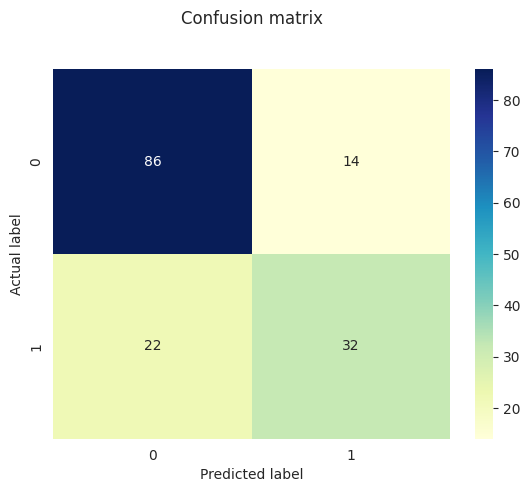

In [26]:
y_pred = knn.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# Evaluates performance of the model

In [27]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       100
           1       0.70      0.59      0.64        54

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154



***Hyperparameter tuning for KNN using GridSearchCV***

In [28]:
param_grid = {
    'n_neighbors': np.arange(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier(5)
knn_cv = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
knn_cv.fit(X_train, y_train)

print("Best Score (CV Accuracy):", knn_cv.best_score_)
print("Best Parameters:", knn_cv.best_params_)

Best Score (CV Accuracy): 0.7817672930827669
Best Parameters: {'metric': 'euclidean', 'n_neighbors': np.int64(25), 'weights': 'uniform'}


***Testing other models***

In [29]:
model_results = {}
model_results["KNeigborsClassifier"] = knn_cv.best_score_


**Logical Regression**

In [30]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
model_results["Logistic Regression"] = accuracy_score(y_test, y_pred_lr)

**Random Forest Classifier**

In [31]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split = 5, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
model_results["Random Forest"] = accuracy_score(y_test, y_pred_rf)

In [35]:
import tensorflow as tf

model = tf.keras.models.Sequential()

# Input layer (input_dim = number of features)
model.add(tf.keras.layers.Dense(units=64, activation='relu', input_dim=X_train.shape[1]))  # First hidden layer
model.add(tf.keras.layers.Dense(units=32, activation='relu'))  # Second hidden layer
model.add(tf.keras.layers.Dense(units=16, activation='relu'))  # Third hidden layer

# Output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))  # For binary classification

# Step 7: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Step 8: Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Step 9: Evaluate the model on the test set
y_pred_ann = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary predictions
test_acc_ann = accuracy_score(y_test, y_pred_ann)
model_results["ANN"] = test_acc_ann

print("ANN Test Accuracy:", test_acc_ann)


Epoch 1/100


/home/njalale/Development/ML/diabetes_analysis/myenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5687 - loss: 0.6861 - val_accuracy: 0.7143 - val_loss: 0.6249
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7189 - loss: 0.6136 - val_accuracy: 0.7143 - val_loss: 0.5645
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7393 - loss: 0.5494 - val_accuracy: 0.7403 - val_loss: 0.5161
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8079 - loss: 0.4726 - val_accuracy: 0.7403 - val_loss: 0.5050
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7933 - loss: 0.4521 - val_accuracy: 0.7078 - val_loss: 0.5166
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7864 - loss: 0.4378 - val_accuracy: 0.7208 - val_loss: 0.5199
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8011 - loss: 0.4212 - val_accuracy: 0.7208 - val_loss: 0.5228
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7982 - loss: 0.4285 - val_accuracy: 0.7273 - val_loss: 0.

***Display Accuracy Scores***

In [36]:
print("\nModel Performance Comparison:")
for model, acc in model_results.items():
    print(f"{model}: {acc:.4f}")


Model Performance Comparison:
KNeigborsClassifier: 0.7818
Logistic Regression: 0.6948
Random Forest: 0.7468
ANN: 0.6948


***Best Model***

In [37]:
best_model = max(model_results, key=model_results.get)
print(f"\nBest Model: {best_model}")


Best Model: KNeigborsClassifier
